In [1]:
import sys
import pandas as pd
import seaborn as sns
from keras.preprocessing.text import text_to_word_sequence

Using TensorFlow backend.
/home/sjnam/anaconda3/envs/infmtv_keras_gpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sjnam/anaconda3/envs/infmtv_keras_gpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sjnam/anaconda3/envs/infmtv_keras_gpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [5]:
df_cloze = pd.read_pickle('../cloze_df_scores_all2.pickle') # enter the local location of DSCoVAR sentence data
df_cloze['targ'] = [targ[2:-2] for targ in df_cloze['targ']]

In [6]:
df_cloze.head()

,Unnamed: 0,index,cloze_resp,sentID_GM,sentence,targ,targ_POS,cloze_resp_len,ent_elmo,ent_cloze,bert_score,glove_score,Unnamed: 0.1,sent_idx,scores,scores_sum,scores_avg,scores_std,scores_avg_rank,elmo_score
0,0,0,"{'fight': 8, 'rift': 6, 'wall': 2, 'wedge': 1,...",{1547},A ______ emerged between the two who were on...,discord,NN,[30],2.246163,2.442118,0.724184,0.295388,954,954,"[0, -1, -1, 0, 0, 0, 0, 0, -1, 0, 1, 1, 0, 0, ...",-3,-0.125000,0.599479,678.5,0.594419
1,1,1,"{'happy': 6, 'unconventional': 2, 'simple': 2,...",{518},A bohemian is a person who is free-spirited a...,rakish,AJ,[30],2.232694,2.765587,0.675923,0.256244,71,71,"[0, 1, 1, 0, 0, 0, 1, 0, 0, -1, -1, 0, -1, 0, ...",0,0.000000,0.645497,842.0,0.542132
2,2,2,"{'stole': 13, 'stolen': 7, 'vandalized': 3, 'd...",{803},A bunch of kids had broken in and ______ the...,defile,VB,[30],2.243330,1.679603,0.896399,0.525470,694,694,"[0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ...",-1,-0.041667,0.538452,787.0,0.778024
3,3,3,"{'berate': 5, 'bully': 4, 'belittle': 3, 'insu...",{747},"A coach should provide leadership, not ______...",browbeat,VB,[30],2.200604,2.682186,0.714305,0.232669,470,470,"[1, 0, 1, 1, 1, -1, 0, 0, 0, 0, 0, 0, 0, 1, 1,...",6,0.250000,0.595119,1237.5,0.663644
4,4,4,"{'force': 4, 'get': 3, 'whip': 2, 'bring': 2, ...",{875},A cowboy used a short whip to ______ his hor...,goad,VB,[30],2.221154,2.921658,0.778465,0.250248,1351,1351,"[1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, -1, 0, 1, 0,...",8,0.333333,0.552771,1365.5,0.663699


In [7]:
FILTERS = '"#$%&()*+/:;<=>@[\\]^`{|}~\t\n'

sentences = []
for sent in df_cloze['sentence']:
    sent = sent.replace("<BOS>", "").replace(".", " .").replace(",", " ,").replace("!", " !").replace(",?", " ?").replace("'s", " 's")
    sent = text_to_word_sequence(sent, lower=False, filters=FILTERS)
    sentences.append(sent)
#     sent_pad = pad_sequences([sent_tok], maxlen=MAX_SEQ_LEN, dtype='object', padding='post', value=[""])       
#     targ_idx = np.where(targ==sent_pad[0])[0][0]
sent_len = [len(sent) for sent in sentences]
targ_loc = [sent.index('______') for sent in sentences]
targ_loc_before = [len(sent) - sent.index('______')-1 for sent in sentences]
targ_loc_end = [x==1 for x in targ_loc_before]
targ_loc_rel = [sent.index('______') / len(sent) for sent in sentences]

df_cloze['sent_len'] = sent_len
df_cloze['targ_loc'] = targ_loc
df_cloze['targ_loc_before'] = targ_loc_before
df_cloze['targ_loc_end'] = targ_loc_end
df_cloze['targ_loc_rel'] = targ_loc_rel

In [8]:
targ_loc_before[:3]

[9, 1, 3]

In [9]:
targ_loc_end[:3]

[False, True, False]

In [10]:
df_cloze.head()

,Unnamed: 0,index,cloze_resp,sentID_GM,sentence,targ,targ_POS,cloze_resp_len,ent_elmo,ent_cloze,...,scores_sum,scores_avg,scores_std,scores_avg_rank,elmo_score,sent_len,targ_loc,targ_loc_before,targ_loc_end,targ_loc_rel
0,0,0,"{'fight': 8, 'rift': 6, 'wall': 2, 'wedge': 1,...",{1547},A ______ emerged between the two who were on...,discord,NN,[30],2.246163,2.442118,...,-3,-0.125000,0.599479,678.5,0.594419,11,1,9,False,0.090909
1,1,1,"{'happy': 6, 'unconventional': 2, 'simple': 2,...",{518},A bohemian is a person who is free-spirited a...,rakish,AJ,[30],2.232694,2.765587,...,0,0.000000,0.645497,842.0,0.542132,11,9,1,True,0.818182
2,2,2,"{'stole': 13, 'stolen': 7, 'vandalized': 3, 'd...",{803},A bunch of kids had broken in and ______ the...,defile,VB,[30],2.243330,1.679603,...,-1,-0.041667,0.538452,787.0,0.778024,12,8,3,False,0.666667
3,3,3,"{'berate': 5, 'bully': 4, 'belittle': 3, 'insu...",{747},"A coach should provide leadership, not ______...",browbeat,VB,[30],2.200604,2.682186,...,6,0.250000,0.595119,1237.5,0.663644,11,7,3,False,0.636364
4,4,4,"{'force': 4, 'get': 3, 'whip': 2, 'bring': 2, ...",{875},A cowboy used a short whip to ______ his hor...,goad,VB,[30],2.221154,2.921658,...,8,0.333333,0.552771,1365.5,0.663699,15,7,7,False,0.466667


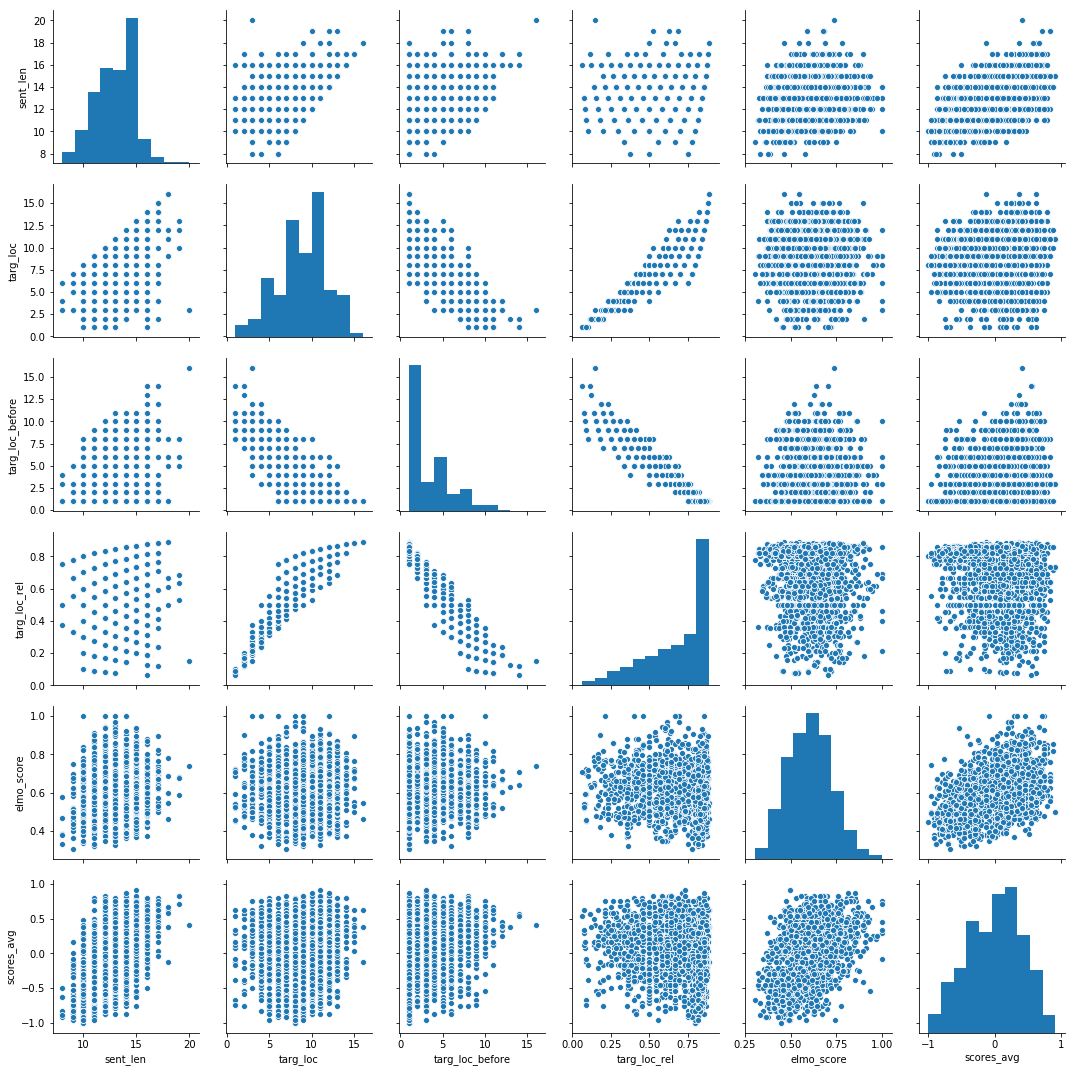

In [11]:
sns.pairplot(df_cloze[['sent_len', 'targ_loc', 'targ_loc_before', 'targ_loc_rel', 'elmo_score', 'scores_avg']])

# adding highfreq synonyms 

In [12]:
df_words = pd.read_csv("dscovar_words_GM.csv", sep="\t", na_values="NA\r")

In [13]:
df_words.head()

,Notes_GF,Audio_File_Name,Number_Sentences,Number_LoLexConstrSentences,Number_MedLexConstrSentences,Number_HiLexConstrSentences,TargID_GM,targ,targ_Type,POS,...,MRC_NSYL,MRC_BFRQ,MRC_KFFRQ,MRC_TLFRQ,MRC_FAM,MRC_AOA,LWV_DOLVL,LWV_PCTCOR,MRC_CNC,MRC_IMG
0,chiefly in botany (modern usage),Word1_AJ_acerate,1.0,NaN,NaN,NaN,1,acerate,rare,AJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chiefly in music (modern usage),Word2_AJ_aleatoric,1.0,NaN,NaN,NaN,2,aleatoric,rare,AJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Word3_AJ_algid,1.0,NaN,NaN,NaN,3,algid,rare,AJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Word4_AJ_aphotic,1.0,NaN,NaN,NaN,4,aphotic,rare,AJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Word5_VB_blench,1.0,NaN,NaN,NaN,5,blench,rare,VB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_words.columns

Index(['Notes_GF', 'Audio_File_Name', 'Number_Sentences',
       'Number_LoLexConstrSentences', 'Number_MedLexConstrSentences',
       'Number_HiLexConstrSentences', 'TargID_GM', 'targ', 'targ_Type', 'POS',
       'Definition1', 'Definition1_Source', 'Definition2',
       'Definition2_Source', 'Synonyms', 'Antonyms', 'Hypernyms',
       'SisterConcepts', 'syn1', 'Syn1_FSG', 'Syn1_BSG', 'Syn1_MESA',
       'Syn1_LSA', 'Syn1_EAT', 'syn2', 'Syn2_FSG', 'Syn2_BSG', 'Syn2_MESA',
       'Syn2_LSA', 'Syn2_EAT', 'syn3', 'Syn3_FSG', 'Syn3_BSG', 'Syn3_MESA',
       'Syn3_LSA', 'Syn3_EAT', 'MRC_NLET', 'MRC_NPHN', 'MRC_NSYL', 'MRC_BFRQ',
       'MRC_KFFRQ', 'MRC_TLFRQ', 'MRC_FAM', 'MRC_AOA', 'LWV_DOLVL',
       'LWV_PCTCOR', 'MRC_CNC', 'MRC_IMG'],
      dtype='object')

In [24]:
syn1 = []
syn2 = []
syn3 = []
for targ in df_cloze['targ']:
    syn1.append(df_words[targ==df_words['targ']]['syn1'].values[0])
    syn2.append(df_words[targ==df_words['targ']]['syn2'].values[0])
    syn3.append(df_words[targ==df_words['targ']]['syn3'].values[0])

In [26]:
df_cloze['syn1'] = syn1
df_cloze['syn2'] = syn2
df_cloze['syn3'] = syn3

In [27]:
df_cloze.head()

,Unnamed: 0,index,cloze_resp,sentID_GM,sentence,targ,targ_POS,cloze_resp_len,ent_elmo,ent_cloze,...,scores_avg_rank,elmo_score,sent_len,targ_loc,targ_loc_before,targ_loc_end,targ_loc_rel,syn1,syn2,syn3
0,0,0,"{'fight': 8, 'rift': 6, 'wall': 2, 'wedge': 1,...",{1547},A ______ emerged between the two who were on...,discord,NN,[30],2.246163,2.442118,...,678.5,0.594419,11,1,9,False,0.090909,conflict,strife,fighting
1,1,1,"{'happy': 6, 'unconventional': 2, 'simple': 2,...",{518},A bohemian is a person who is free-spirited a...,rakish,AJ,[30],2.232694,2.765587,...,842.0,0.542132,11,9,1,True,0.818182,hip,cool,bohemian
2,2,2,"{'stole': 13, 'stolen': 7, 'vandalized': 3, 'd...",{803},A bunch of kids had broken in and ______ the...,defile,VB,[30],2.243330,1.679603,...,787.0,0.778024,12,8,3,False,0.666667,ruin,spoil,deface
3,3,3,"{'berate': 5, 'bully': 4, 'belittle': 3, 'insu...",{747},"A coach should provide leadership, not ______...",browbeat,VB,[30],2.200604,2.682186,...,1237.5,0.663644,11,7,3,False,0.636364,bully,bully,hector
4,4,4,"{'force': 4, 'get': 3, 'whip': 2, 'bring': 2, ...",{875},A cowboy used a short whip to ______ his hor...,goad,VB,[30],2.221154,2.921658,...,1365.5,0.663699,15,7,7,False,0.466667,nag,coerce,NaN


In [28]:
df_cloze.to_pickle('../cloze_df_scores_all3.pickle') 

In [42]:
df_cloze['syn1'].isnull().values.any()

False

In [2]:
df_cloze = pd.read_pickle('../cloze_df_scores_all3.pickle') 

In [8]:
df_cloze.shape

(1783, 28)

In [7]:
for i, sent in enumerate(df_cloze['sentence']):
    with open("_sentences_txt/dscovar_sent_"+str(i).zfill(4)+".txt", 'w') as f:
        f.write(sent)